In [309]:
import os
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns
from random import randrange, uniform

In [310]:
os.chdir("C:/Users/Jayandran/Documents/Edwisor Questions")

In [311]:
os.getcwd()


'C:\\Users\\Jayandran\\Documents\\Edwisor Questions'

In [312]:
#Extracting the excel file
df_card=pd.read_csv("credit-card-data.csv",sep=",",encoding= "ISO-8859-1")


In [313]:
missing_val=pd.DataFrame(df_card.isnull().sum())

In [314]:
missing_val=missing_val.reset_index()
missing_val

,index,0
0,CUST_ID,0
1,BALANCE,0
2,BALANCE_FREQUENCY,0
3,PURCHASES,0
4,ONEOFF_PURCHASES,0
5,INSTALLMENTS_PURCHASES,0
6,CASH_ADVANCE,0
7,PURCHASES_FREQUENCY,0
8,ONEOFF_PURCHASES_FREQUENCY,0
9,PURCHASES_INSTALLMENTS_FREQUENCY,0


In [315]:
missing_val=missing_val.rename(columns={'index':'Variables',0:'Missing_Percentage'})


In [316]:
# Calculate Percentage
missing_val['Missing_Percentage']=(missing_val['Missing_Percentage']/len(df_card))*100
#minimum_payment - 3.49%

In [317]:
#Credit Limit variable has 1 value and Minimum payment has 313 missing values

In [318]:
r=df_card['CREDIT_LIMIT'].isnull()


In [319]:
for i in range(0,len(r)):
  if r[i]== True:
    print(i)

5203


In [320]:
#index value=5203
#Removing the specific index
df_card.drop(df_card.index[5203],axis=0,inplace=True)
df_card.shape

(8949, 18)

In [321]:
#Resetting index
df_card.reset_index(inplace=True)

In [322]:
#Dropping and resetting index
df_card.drop('index',axis=1,inplace=True)

In [323]:
#missing value analysis for better imputation method
df_card.loc[33,'MINIMUM_PAYMENTS']
#Actual Value=196.301885

196.301885

In [324]:
#Imputing by mean
df_card.loc[33,'MINIMUM_PAYMENTS']=np.nan

In [325]:
df_card['MINIMUM_PAYMENTS']=df_card['MINIMUM_PAYMENTS'].fillna(df_card['MINIMUM_PAYMENTS'].mean())

In [326]:
#Impute with Mean
df_card.loc[33,'MINIMUM_PAYMENTS']=191.1233
#Mean vaue=864.382

In [51]:
#Impute with Median
#df_card.loc[33,'MINIMUM_PAYMENTS']=np.nan

In [52]:
#df_card['MINIMUM_PAYMENTS']=df_card['MINIMUM_PAYMENTS'].fillna(df_card['MINIMUM_PAYMENTS'].median())

In [53]:
#Impute with Median
#df_card.loc[33,'MINIMUM_PAYMENTS']
#Mean vaue=312.560636

312.560636

In [327]:
df_card.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [328]:
###Dervivng #Categorical Variable Card_use_type
df_card['Card_use_type']='s'

In [329]:
for i in range(0,len(df_card)):
    if df_card['ONEOFF_PURCHASES'].iloc[i]==0.0 and df_card['INSTALLMENTS_PURCHASES'].iloc[i]==0.0 and df_card['CASH_ADVANCE'].iloc[i]==0.0:
        print(i)
#2221-index

2221


In [330]:
df_card=df_card.drop(df_card.index[2221],axis=0)

In [334]:
df_card.loc[2221,:]

CUST_ID                              C12292
BALANCE                             684.659
BALANCE_FREQUENCY                         1
PURCHASES                            184.68
ONEOFF_PURCHASES                          0
INSTALLMENTS_PURCHASES               184.68
CASH_ADVANCE                              0
PURCHASES_FREQUENCY                       1
ONEOFF_PURCHASES_FREQUENCY                0
PURCHASES_INSTALLMENTS_FREQUENCY          1
CASH_ADVANCE_FREQUENCY                    0
CASH_ADVANCE_TRX                          0
PURCHASES_TRX                            12
CREDIT_LIMIT                           2900
PAYMENTS                             2837.2
MINIMUM_PAYMENTS                    350.274
PRC_FULL_PAYMENT                        0.4
TENURE                                   12
Card_use_type                             s
Name: 2221, dtype: object

In [332]:
#Resetting index
df_card.reset_index(inplace=True)

In [333]:
#Dropping and resetting index
df_card.drop('index',axis=1,inplace=True)

In [335]:
df_card['Card_use_type']='s'

In [255]:
for i in range(0,len(df_card)):
    if df_card['ONEOFF_PURCHASES'].iloc[i] > 0 and df_card['INSTALLMENTS_PURCHASES'].iloc[i] > 0 and df_card['CASH_ADVANCE'].iloc[i] > 0:
        df_card.loc[i,'Card_use_type']="All type"
    elif df_card['ONEOFF_PURCHASES'].iloc[i] > 0 and df_card['INSTALLMENTS_PURCHASES'].iloc[i] > 0:
        df_card.loc[i,'Card_use_type'] ="Both"
    elif df_card['ONEOFF_PURCHASES'].iloc[i] > 0:
        df_card.loc[i,'Card_use_type']="One-off"
    elif df_card['INSTALLMENTS_PURCHASES'].iloc[i] > 0:
        df_card.loc[i,'Card_use_type'] ="Installment"
    else:
        df_card.loc[i,'Card_use_type'] ="Cash Advance"

In [337]:
#Deriving new KPI's. 
#Monthly Avg Purchase=(Purchase Amt)/n.o of months used for purchasing
#N.o of months used for purchasing=purchase freq*Tenure
df_card['Monthly_Avg_Purchase']=0
df_card['Months_used_for_purchase']=0

In [338]:
df_card['Months_used_for_purchase']=round((df_card['PURCHASES_FREQUENCY'])*(df_card['TENURE']))

In [339]:
df_card['Monthly_Avg_Purchase']=df_card['PURCHASES']/df_card['Months_used_for_purchase']

In [67]:
df_card.fillna(0)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Card_use_type,Monthly_Avg_Purchase,Months_used_for_purchase
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,...,0,2,1000.0,201.802084,139.509787,0.000000,12,Installment,47.700000,2.0
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,...,4,0,7000.0,4103.032597,1072.340217,0.222222,12,Cash Advance,0.000000,0.0
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,...,0,12,7500.0,622.066742,627.284787,0.000000,12,One-off,64.430833,12.0
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,...,1,1,7500.0,0.000000,312.560636,0.000000,12,One-off,1499.000000,1.0
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,...,0,1,1200.0,678.334763,244.791237,0.000000,12,One-off,16.000000,1.0
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,...,0,8,1800.0,1400.057770,2407.246035,0.000000,12,Installment,166.660000,8.0
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,...,0,64,13500.0,6354.314328,198.065894,1.000000,12,Both,590.917500,12.0
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,...,0,12,2300.0,679.065082,532.033990,0.000000,12,Installment,36.350000,12.0
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,...,0,5,7000.0,688.278568,311.963409,0.000000,12,Both,215.372500,4.0
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,...,0,3,11000.0,1164.770591,100.302262,0.000000,12,One-off,640.800000,2.0


In [341]:
#Monthly Cash Adv Amt=(Cash Adv Amt)/(n.o of months used for cash adv amt)
#N.o of months used for cash adv amt=cash adv amt freq*Tenure
df_card['Months_used_for_cash_adv']=round((df_card['CASH_ADVANCE_FREQUENCY'])*(df_card['TENURE']))
df_card['Monthly_avg_cash_adv_amt']=df_card['CASH_ADVANCE']/df_card['Months_used_for_cash_adv']

In [343]:
df_card.fillna(0,inplace=True)

In [342]:
#Limit Usage:- Balance/Credit Limit
df_card['Limit_Usage']=df_card['BALANCE']/df_card['CREDIT_LIMIT']

In [344]:
#Payment Ratio=Payment/Min Payment due
df_card['Payment_Ratio']=df_card['PAYMENTS']/df_card['MINIMUM_PAYMENTS']

In [93]:
df_card.fillna(0.0,inplace=True)

In [345]:
df_card.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
Card_use_type                       0
Monthly_Avg_Purchase                0
Months_used_for_purchase            0
Months_used_for_cash_adv            0
Monthly_avg_cash_adv_amt            0
Limit_Usage                         0
Payment_Ratio                       0
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x13b269ffeb8>,
 'caps': [<matplotlib.lines.Line2D at 0x13b26a1a780>,
 'boxes': [<matplotlib.lines.Line2D at 0x13b269ffd68>],
 'medians': [<matplotlib.lines.Line2D at 0x13b26a1ae10>],
 'fliers': [<matplotlib.lines.Line2D at 0x13b26a1aef0>],
 'means': []}

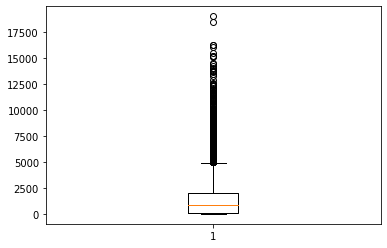

In [346]:
#Outlier Analysis
# #Plot boxplot to visualize Outliers
%matplotlib inline  
plt.boxplot(df_card['BALANCE'])

In [347]:
cnames=['BALANCE','CREDIT_LIMIT','PAYMENTS']
#Outlier variables

In [348]:
for i in cnames:
    print(i)
    q75,q25=np.percentile(df_card.loc[:,i],[75,25])
    iqr = q75 - q25
    min = q25 - (iqr*1.5)
    max = q75 + (iqr*1.5)
    print(min)
    print(max)
    
    df_card = df_card.drop(df_card[df_card.loc[:,i] < min].index)
    df_card = df_card.drop(df_card[df_card.loc[:,i] > max].index)

BALANCE
-2760.9436481249995
4943.8069508749995
CREDIT_LIMIT
-4800.0
12000.0
PAYMENTS
-1596.0115828749997
3594.2462421249998


In [349]:
df_card.shape

(7280, 25)

In [350]:
df_card.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
Card_use_type                        object
Monthly_Avg_Purchase                float64
Months_used_for_purchase            float64
Months_used_for_cash_adv            float64
Monthly_avg_cash_adv_amt        

In [352]:
#Resetting index
df_card.reset_index(inplace=True)

In [353]:
#Dropping and resetting index
df_card.drop('index',axis=1,inplace=True)

In [354]:
#Correlation Analysis

#Correcting vriable types
df_card.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE', 'Card_use_type',
       'Monthly_Avg_Purchase', 'Months_used_for_purchase',
       'Months_used_for_cash_adv', 'Monthly_avg_cash_adv_amt', 'Limit_Usage',
       'Payment_Ratio'],
      dtype='object')

In [355]:
cnum=['BALANCE','BALANCE_FREQUENCY','PURCHASES','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE','Monthly_Avg_Purchase', 'Months_used_for_purchase',
       'Months_used_for_cash_adv', 'Monthly_avg_cash_adv_amt', 'Limit_Usage',
       'Payment_Ratio']

In [356]:
df_corr = df_card.loc[:,cnum]

In [357]:
df_corr.shape

(7280, 23)

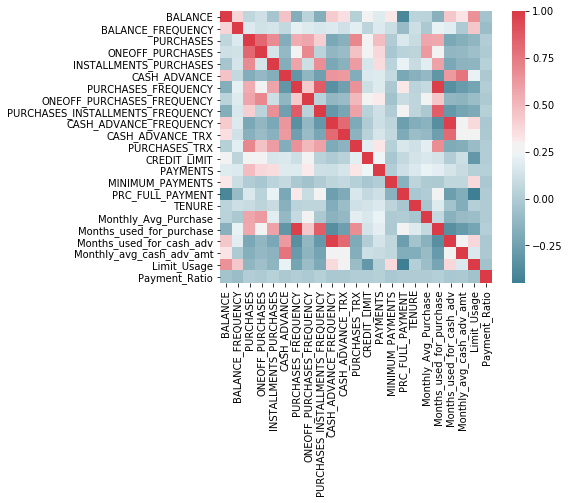

In [358]:
#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(7, 5))

#Generate correlation matrix
corr = df_corr.corr()

#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [359]:
#Reducing Dimensions based on corr plot
cnum=['BALANCE','BALANCE_FREQUENCY','PURCHASES_FREQUENCY','CASH_ADVANCE_FREQUENCY','PRC_FULL_PAYMENT','Monthly_Avg_Purchase','Monthly_avg_cash_adv_amt', 'Limit_Usage',
       'Payment_Ratio']

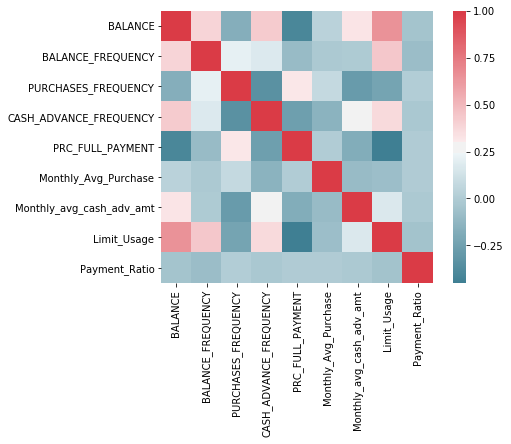

In [360]:
df_corr = df_card.loc[:,cnum]
#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(7, 5))

#Generate correlation matrix
corr = df_corr.corr()

#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [361]:
#Normalisation of data
df_new=df_corr


In [362]:
df_new.dtypes

BALANCE                     float64
BALANCE_FREQUENCY           float64
PURCHASES_FREQUENCY         float64
CASH_ADVANCE_FREQUENCY      float64
PRC_FULL_PAYMENT            float64
Monthly_Avg_Purchase        float64
Monthly_avg_cash_adv_amt    float64
Limit_Usage                 float64
Payment_Ratio               float64
dtype: object

In [364]:
for i in cnum:
    print(i)
    df_new[i]=(df_new[i]-df_new[i].mean())/df_new[i].std()

BALANCE
BALANCE_FREQUENCY
PURCHASES_FREQUENCY
CASH_ADVANCE_FREQUENCY
PRC_FULL_PAYMENT
Monthly_Avg_Purchase
Monthly_avg_cash_adv_amt
Limit_Usage
Payment_Ratio


In [301]:
#for i in cnum:
 #   print(i)
  #  df_new[i]=(df_new[i]-(df_new[i].min()))/((df_new[i].max())-(df_new[i].min()))

BALANCE
BALANCE_FREQUENCY
PURCHASES_FREQUENCY
CASH_ADVANCE_FREQUENCY
PRC_FULL_PAYMENT
Monthly_Avg_Purchase
Monthly_avg_cash_adv_amt
Limit_Usage
Payment_Ratio


In [365]:
#Load required libraries
from sklearn.cluster import KMeans

#Estimate optimum number of clusters
cluster_range = range( 1, 20 )
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans(num_clusters).fit(df_new.iloc[:,0:8])
    cluster_errors.append(clusters.inertia_)
    
#Create dataframe with cluster errors
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

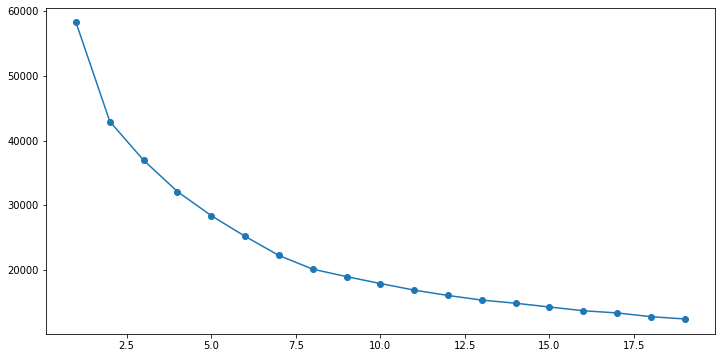

In [366]:
#Plot line chart to visualise number of clusters
%matplotlib inline  
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [367]:
#Implement kmeans
kmeans_model = KMeans(n_clusters = 3).fit(df_new.iloc[:,0:8])
#Number of clusters=3 (0,1,2)

In [368]:
#Extracting index and cluster num
df_r=(kmeans_model.labels_)

In [369]:
#Appending clusters to original data frame
df_card['Clusters']=df_r

In [370]:
df_card['Clusters'].value_counts()
#
#1    3340
#2    2701
#0    1239
#Name: Clusters, dtype: int64

1    3340
2    2701
0    1239
Name: Clusters, dtype: int64

In [371]:
df_card['Clusters']=df_card['Clusters'].astype(object)

In [373]:
#Visualizations

from ggplot import *

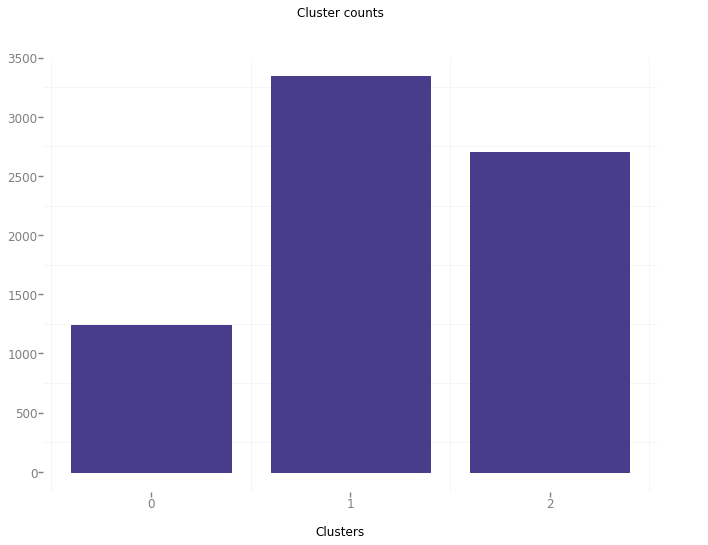

<ggplot: (84598948111)>

In [374]:
#bar plot
ggplot(df_card, aes(x='Clusters')) +\
    geom_bar(fill= "DarkSlateBlue") +\
    scale_color_brewer(type='diverging', palette=4) +\
    xlab("Clusters")  + ggtitle("Cluster counts") + theme_bw()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


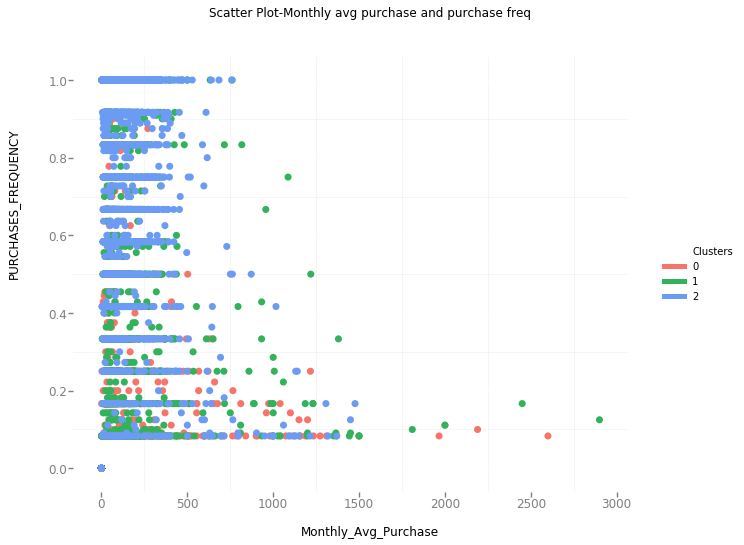

<ggplot: (84599273066)>

In [375]:
#Multivariate #Scatter Plot-Monthly avg purchase and purchase freq
ggplot(df_card, aes(x = 'Monthly_Avg_Purchase', y = 'PURCHASES_FREQUENCY', color='Clusters')) + \
    geom_point(alpha = 1, size = 50)  +theme_bw()+ ylab("PURCHASES_FREQUENCY") + xlab("Monthly_Avg_Purchase") + ggtitle("Scatter Plot-Monthly avg purchase and purchase freq")

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


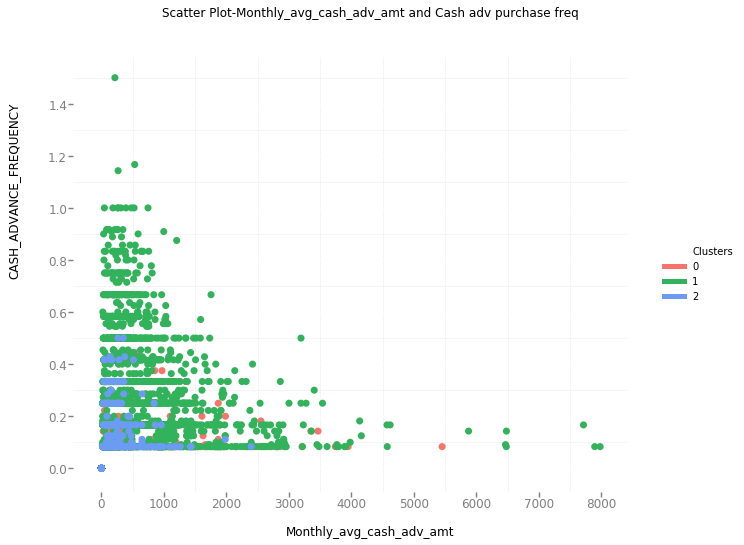

<ggplot: (84599459129)>

In [376]:
#Multivariate #Scatter Plot-Monthly avg purchase and purchase freq
ggplot(df_card, aes(x = 'Monthly_avg_cash_adv_amt', y = 'CASH_ADVANCE_FREQUENCY', color='Clusters')) + \
    geom_point(alpha = 1, size = 50)  +theme_bw()+ ylab("CASH_ADVANCE_FREQUENCY") + xlab("Monthly_avg_cash_adv_amt") + ggtitle("Scatter Plot-Monthly_avg_cash_adv_amt and Cash adv purchase freq")

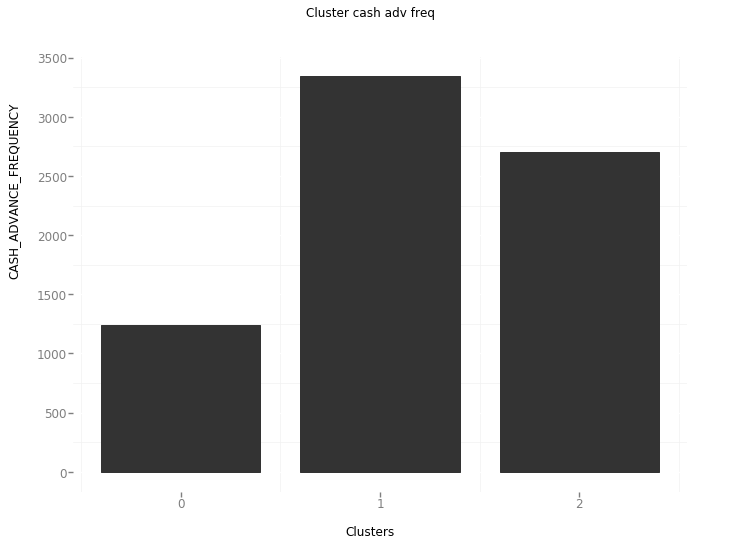

<ggplot: (84599379106)>

In [377]:
#bar plot
ggplot(aes(x='Clusters',y='CASH_ADVANCE_FREQUENCY'),data=df_card,) +\
    geom_bar() +\
    xlab("Clusters")+ ylab("CASH_ADVANCE_FREQUENCY")  + ggtitle("Cluster cash adv freq") + theme_bw()

In [378]:
df_card_payr=df_card.loc[(df_card.Payment_Ratio <30)]

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


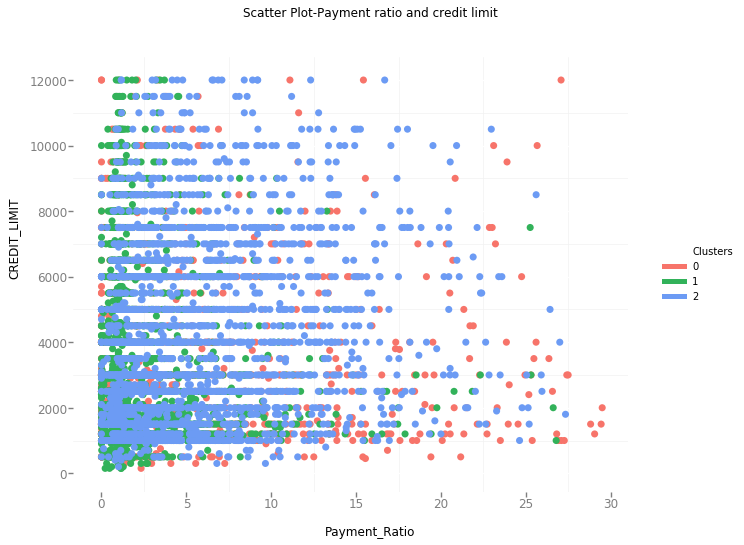

<ggplot: (-9223371952255092571)>

In [379]:
#Multivariate #Scatter Plot-Payment ratio and credit limit
ggplot(df_card_payr, aes(x = 'Payment_Ratio', y = 'CREDIT_LIMIT', color='Clusters')) + \
    geom_point(alpha = 1, size = 50)  +theme_bw()+ ylab("CREDIT_LIMIT") + xlab("Payment_Ratio") + ggtitle("Scatter Plot-Payment ratio and credit limit")

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


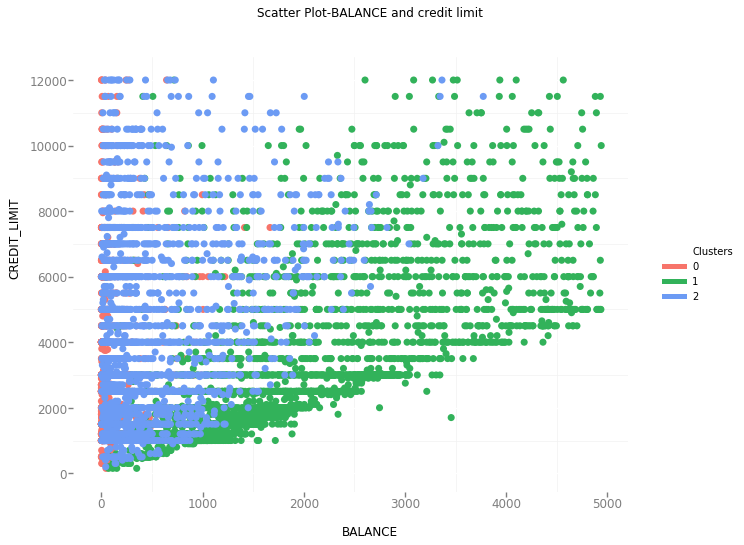

<ggplot: (84599683297)>

In [380]:
#Multivariate #Scatter Plot-Payment ratio and credit limit
ggplot(df_card, aes(x = 'BALANCE', y = 'CREDIT_LIMIT', color='Clusters')) + \
    geom_point(alpha = 1, size = 50)  +theme_bw()+ ylab("CREDIT_LIMIT") + xlab("BALANCE") + ggtitle("Scatter Plot-BALANCE and credit limit")

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


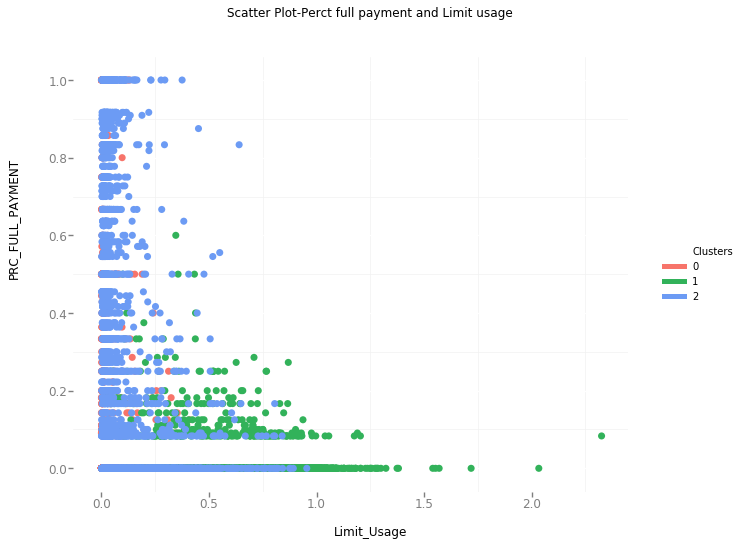

<ggplot: (-9223371952254573557)>

In [381]:
#Multivariate #Scatter Plot-Perct full payment and Limit usage
ggplot(df_card, aes(x = 'Limit_Usage', y = 'PRC_FULL_PAYMENT', color='Clusters')) + \
    geom_point(alpha = 1, size = 50)  +theme_bw()+ ylab("PRC_FULL_PAYMENT") + xlab("Limit_Usage") + ggtitle("Scatter Plot-Perct full payment and Limit usage")

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


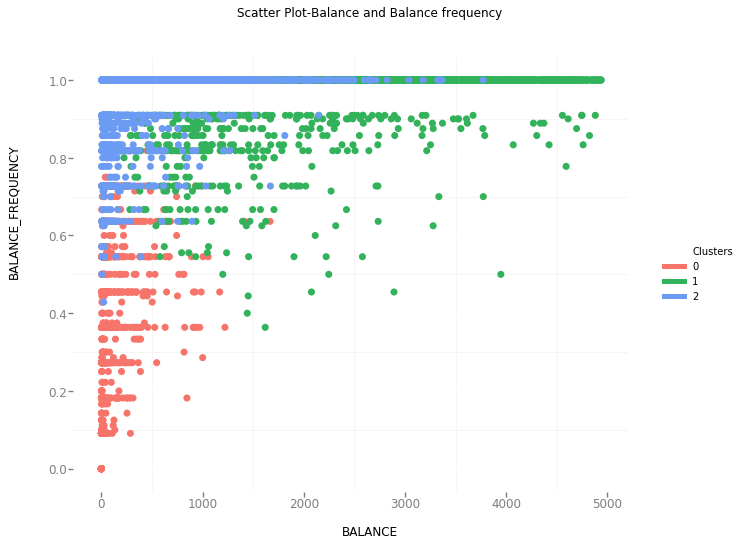

<ggplot: (-9223371952254509929)>

In [382]:
#Multivariate #Scatter Plot- Balance and Balance frequency
ggplot(df_card_payr, aes(x = 'BALANCE', y = 'BALANCE_FREQUENCY', color='Clusters')) + \
    geom_point(alpha = 1, size = 50)  +theme_bw()+ ylab("BALANCE_FREQUENCY") + xlab("BALANCE") + ggtitle("Scatter Plot-Balance and Balance frequency")

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


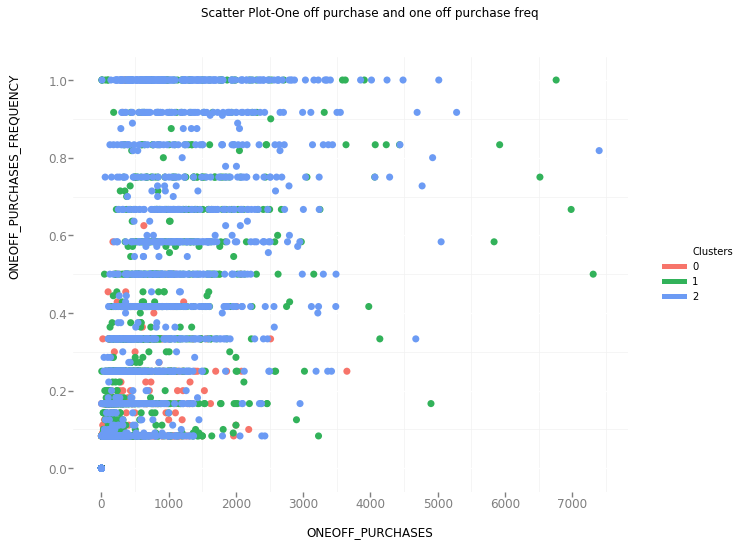

<ggplot: (84600533403)>

In [383]:
#Multivariate #Scatter Plot- One off purchase and one off purchase freq
ggplot(df_card_payr, aes(x = 'ONEOFF_PURCHASES', y = 'ONEOFF_PURCHASES_FREQUENCY', color='Clusters')) + \
    geom_point(alpha = 1, size = 50)  +theme_bw()+ ylab("ONEOFF_PURCHASES_FREQUENCY") + xlab("ONEOFF_PURCHASES") + ggtitle("Scatter Plot-One off purchase and one off purchase freq")

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


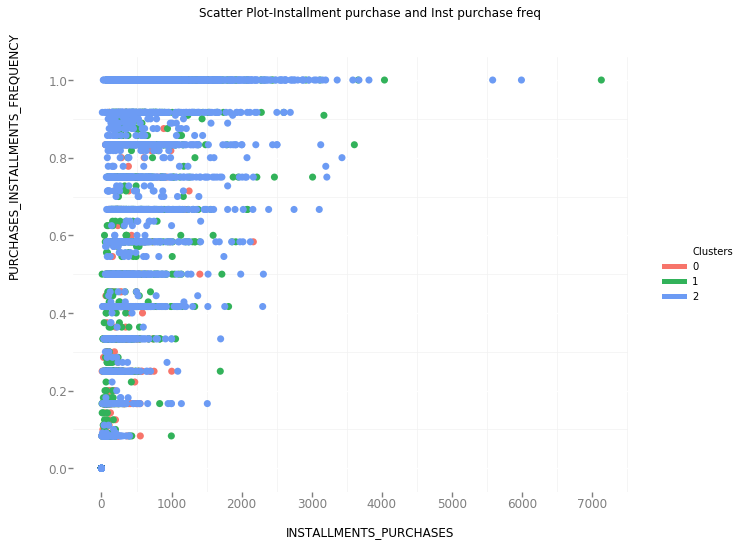

<ggplot: (-9223371952254312718)>

In [384]:
#Multivariate #Scatter Plot- Installment purchase and Inst purchase freq
ggplot(df_card_payr, aes(x = 'INSTALLMENTS_PURCHASES', y = 'PURCHASES_INSTALLMENTS_FREQUENCY', color='Clusters')) + \
    geom_point(alpha = 1, size = 50)  +theme_bw()+ ylab("PURCHASES_INSTALLMENTS_FREQUENCY") + xlab("INSTALLMENTS_PURCHASES") + ggtitle("Scatter Plot-Installment purchase and Inst purchase freq")